## 워드클리우드 시각화
DB에서 추출한 엑셀 파일(tag_research.xlsx)에 데이터를 임의로 추가하여 사용함.

### 엑셀 파일 불러오기

In [ ]:
import pandas as pd

df = pd.read_excel("tagging_results2.xlsx")
df.head()

,id,session_id,username,report_tags,counsel_tags,tag_reasons,timestamp
0,1,89b75489-abf6-47ad-9f8b-d5721f1a99d9,test123,"[""신체학대""]","[""아동 신체학대""]","태깅 결과: {""tags"": [""신체학대""]}\n\n- 신체학대: 아빠가 화가 나서...",48:12.1
1,2,89b75489-abf6-47ad-9f8b-d5721f1a99d9,test123,"[""신체학대""]","[""아동 신체학대""]","태깅 결과: {""tags"": [""신체학대""]}\n\n- 신체학대: 아빠가 화가 나서...",02:50.1
2,3,355982c2-4256-48f2-890d-84581d8380b0,test123,"[""신체학대""]","[""아동 신체학대""]","태깅 결과: {""tags"": [""신체학대""]}\n\n- 신체학대: 아빠가 화가 나서...",52:11.8
3,4,355982c2-4256-48f2-890d-84581d8380b0,test123,"[""신체학대"", ""정서학대""]","[""아동 신체학대"", ""아동 정서학대""]","태깅 결과: {""tags"": [""신체학대"", ""정서학대""]}\n\n- 신체학대: 아...",54:23.5
4,5,355982c2-4256-48f2-890d-84581d8380b0,test123,"[""신체학대""]","[""아동 신체학대""]","태깅 결과: {""tags"": [""신체학대""]}\n\n- 신체학대: 아빠가 화가 나서...",05:11.2


### 엑셀 파일 전처리

In [ ]:
# 필요한 컬럼만 남기기
df_filtered = df[["session_id", "report_tags"]]
df_filtered.head()

,session_id,report_tags
0,89b75489-abf6-47ad-9f8b-d5721f1a99d9,"[""신체학대""]"
1,89b75489-abf6-47ad-9f8b-d5721f1a99d9,"[""신체학대""]"
2,355982c2-4256-48f2-890d-84581d8380b0,"[""신체학대""]"
3,355982c2-4256-48f2-890d-84581d8380b0,"[""신체학대"", ""정서학대""]"
4,355982c2-4256-48f2-890d-84581d8380b0,"[""신체학대""]"


In [ ]:
# 세션 아이디별로 하나의 데이터만 남기기: session_id가 중복된 경우 가장 처음 등장한 행만 남기고 나머지는 제거
df_unique = df_filtered.drop_duplicates(subset='session_id', keep='first')
df_unique = df_unique.reset_index(drop=True)
df_unique.head()

,session_id,report_tags
0,89b75489-abf6-47ad-9f8b-d5721f1a99d9,"[""신체학대""]"
1,355982c2-4256-48f2-890d-84581d8380b0,"[""신체학대""]"
2,11111111-aaaa-4bbb-cccc-1234567890ab,"[""신체학대""]"
3,22222222-bbbb-4ccc-dddd-1234567890ab,"[""성학대""]"
4,33333333-cccc-4ddd-eeee-1234567890ab,"[""정서학대""]"


In [ ]:
import ast

# 문자열 리스트 -> 실제 리스트로 변환
df_unique['report_tags'] = df_unique['report_tags'].apply(ast.literal_eval)

In [ ]:
# 모든 태그를 한 리스트로 합치기
all_tags = []

for tags in df_unique['report_tags']:
    all_tags.extend(tags)  # 리스트 안의 각 태그를 추가


In [ ]:
# 워드클라우드용 문자열로 변환
text_for_wc = " ".join(all_tags)  # 공백으로 연결

### 워드클라우드 생성

In [ ]:
!pip install wordcloud matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


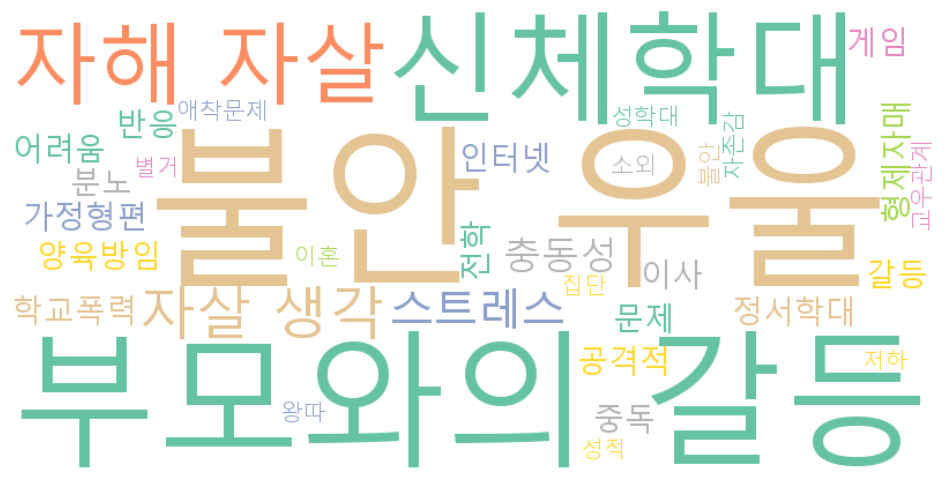

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='C:/Windows/Fonts/malgun.ttf',
    colormap='Set2'  # 다른 예: 'Set2', 'viridis'
).generate(text_for_wc)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


<br>

### 빈출 태그 top5

In [ ]:
from collections import Counter

# 태그 빈도 계산
tag_counter = Counter(all_tags)

# 상위 5개 태그 출력
top5 = tag_counter.most_common(5)
print(top5)

[('불안/우울', 14), ('부모와의 갈등', 10), ('신체학대', 8), ('자해/자살 생각', 7), ('정서학대', 2)]
